In [ ]:
!pip install opencv-python
!pip install easyocr

     |████████████████████████████████| 63.6 MB 15 kB/s 


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16
import urllib.request
import json
from tqdm import tqdm
import requests
import warnings
warnings.filterwarnings('ignore')

In [ ]:
reader = easyocr.Reader(['en'],gpu = True)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data_4.csv')

In [ ]:
df = data[data['upvote ratio']>=data['upvote ratio'].quantile(.6782)]
df.shape

(30000, 15)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
from skimage import io
def url_to_cvimage(url):
    try:
        image = io.imread(url)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.waitKey(0)
        return image
    except:
        return "N/A"

In [ ]:
def cvimage_to_pic(cvimage):
    temp = cv2.cvtColor(cvimage, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(temp)
    plt.show()

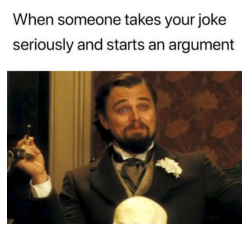

In [ ]:
cvimage_to_pic(url_to_cvimage(data.media.values[29998]))

In [ ]:
df.insert(11,'text_from_meme','Not Present')

In [ ]:
#extracting text from meme with easyocr
for index in tqdm(df.index):
    try:
        urllib.request.urlretrieve(df.media.values[index],'image.jpg')
        output = reader.readtext('image.jpg',decoder = 'greedy', beamWidth= 5, batch_size = 1,
                            workers = 0, allowlist = None, blocklist = None, detail = 1,
                            rotation_info = None, paragraph = False, min_size = 20,
                            contrast_ths = 0.1,adjust_contrast = 0.5, filter_ths = 0.003,
                            text_threshold = 0.7, low_text = 0.4, link_threshold = 0.4,
                            canvas_size = 2560, mag_ratio = 1.,
                            slope_ths = 0.1 , ycenter_ths = 0.5, height_ths = 0.5,
                            width_ths = 0.5, y_ths = 0.5, x_ths = 1.0, add_margin = 0.1, output_format='standard')
        text = ""  
        for i in range(len(output)):
            text = text + " " +''.joi n(output[i][1])   
            text = text.strip() 
    except:
        text = 'Fail'
    df['text_from_meme'][index] = text 

100%|██████████| 30000/30000 [16:47:45<00:00,  2.02s/it]


In [ ]:
df.to_csv('/content/drive/MyDrive/case_study_2/input/data_6.csv',index=False)

In [ ]:
df

,created_utc,id,is_nsfw,media,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,title,ups,text_from_meme,url,upvote ratio,dank_level,Time_of_day
0,1.628380e+09,p040e9,0,https://i.redd.it/238mczwev0g71.jpg,0,1430077,114.0,https://b.thumbs.redditmedia.com/WBdc-Nus6faSe...,140.0,Invest in ye mudders credit card,167,ME etiN ILM purchased themHsin' mexmueders cre...,/r/MemeEconomy/comments/p040e9/invest_in_ye_mu...,0.000117,0,5
1,1.628366e+09,p002qn,0,https://i.redd.it/4yacuh18qzf71.jpg,0,1430077,140.0,https://b.thumbs.redditmedia.com/avzbtegaypC3l...,140.0,Invest in bio-security,60,,/r/MemeEconomy/comments/p002qn/invest_in_biose...,0.000042,0,4
2,1.628364e+09,ozzmum,0,https://i.redd.it/fkqta3ctlzf71.jpg,0,1430077,140.0,default,140.0,INVEST in Jontron slicing the price in half! A...,15,,/r/MemeEconomy/comments/ozzmum/invest_in_jontr...,0.000010,0,4
3,1.628357e+09,ozxfph,0,https://i.redd.it/xv0li2430zf71.png,0,1430077,140.0,https://b.thumbs.redditmedia.com/2GQTtYFKN3Om9...,140.0,Invest in Elmo in Vietnam,26,,/r/MemeEconomy/comments/ozxfph/invest_in_elmo_...,0.000018,0,4
4,1.628355e+09,ozwwz7,0,https://i.redd.it/n4ouph71vyf71.jpg,0,1430077,140.0,default,140.0,Invest in woman with her statue,23,56E 0 B,/r/MemeEconomy/comments/ozwwz7/invest_in_woman...,0.000016,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.626223e+09,ojsvpg,0,https://i.redd.it/gpd9iziop2b71.jpg,1,5070468,140.0,https://b.thumbs.redditmedia.com/4aQzhaDde3mZh...,140.0,What now?,2881,"r/AmltheAsshole users when are; in fact, the a...",/r/dankmemes/comments/ojsvpg/what_now/,0.000568,1,0
29996,1.626222e+09,ojsswy,0,https://i.redd.it/gt1zfdhwo2b71.jpg,1,5070468,137.0,https://b.thumbs.redditmedia.com/6c8QPlqZE0a6F...,140.0,Mom is too powerful,145,"HaHAHA YOU am a gamerl Are So INNOCENT"" Me who...",/r/dankmemes/comments/ojsswy/mom_is_too_powerful/,0.000029,0,0
29997,1.626222e+09,ojspzg,0,https://i.redd.it/j6xkiq72o2b71.jpg,1,5070468,140.0,https://a.thumbs.redditmedia.com/7uHSLxutkzIIK...,140.0,"As a Brit, i'm scared you'll invade us now!",38,Over the Counter Aspirin in America $10 Over t...,/r/dankmemes/comments/ojspzg/as_a_brit_im_scar...,0.000007,0,0
29998,1.626222e+09,ojsodw,0,https://i.redd.it/xki1it0ln2b71.jpg,1,5070468,129.0,https://b.thumbs.redditmedia.com/hVKhOjex1n2gW...,140.0,Are you serious 🧐,88,Whenl,/r/dankmemes/comments/ojsodw/are_you_serious/,0.000017,0,0


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/case_study_2/input/data_6.csv')

In [ ]:
data.insert(12,'text_words','empty')

In [ ]:
for i in tqdm(range(data.shape[0])):
    try:
        if math.isnan(data.text_from_meme[i]):
            data.text_from_meme[i]='Fail'
    except:
        pass

100%|██████████| 30000/30000 [00:00<00:00, 61342.98it/s]


In [ ]:
data[data.text_from_meme=='Fail'].shape

(3287, 17)

In [ ]:
# concatenating title and text information
for index in tqdm(data.index): 
    if data['text_words'][index] == 'empty':   
        title = data['title'][index]
        text_from_meme = data['text_from_meme'][index] 
        try:
            if text_from_meme=='Fail':
                text_from_meme = ''  
            words = title + ' '+ text_from_meme
        except:
            words = 'Fail'
        data['text_words'][index] = words

100%|██████████| 30000/30000 [00:10<00:00, 2856.33it/s]


In [ ]:
data.to_csv('/content/drive/MyDrive/case_study_2/input/data_6u.csv',index=False)